In [1]:
   # Import our dependencies
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
import seaborn as sns

# Import our input dataset
file_path = '/content/blkjckhands_reduced.csv'  # Replace with your file path
data = pd.read_csv(file_path)

data

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dealcard4,dealcard5,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
1,1,Player2,10,9,0,0,0,19,10,8,...,0,0,18,nowin,Win,Plwin,Beat,20,0,19
2,2,Player3,9,8,0,0,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,17
3,3,Player4,2,10,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
4,4,Player5,10,2,0,5,0,17,10,8,...,0,0,18,nowin,Loss,Beat,Dlwin,0,10,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,13
299996,2,Player3,4,2,7,0,0,13,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,6
299997,3,Player4,2,8,3,0,0,13,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,10
299998,4,Player5,7,5,0,4,0,16,2,4,...,0,0,17,nowin,Loss,Beat,Dlwin,0,10,12


In [2]:
# Convert the data into a pandas DataFrame
df = pd.DataFrame(data)

# Add a unique ID column
df['unique_id'] = range(1, len(df) + 1)

# Create a new column 'DealershandsPlayed' by counting values > 0 across card1, card2, card3, card4, card5
df['DealershandsPlayed'] = (df[['dealcard1', 'dealcard2', 'dealcard3', 'dealcard4', 'dealcard5']] > 0).sum(axis=1)

# Create the three new columns (ply3cardsum, ply4cardsum, and ply5cardsum) that sum the values of different combinations of the card columns (card1, card2, card3, card4, and card5)
df['ply3cardsum'] = df['card1'] + df['card2'] + df['card3']
df['ply4cardsum'] = df['card1'] + df['card2'] + df['card3'] + df['card4']
df['ply5cardsum'] = df['card1'] + df['card2'] + df['card3'] + df['card4'] + df['card5']

# Create the three new columns (dl2cardsum, dl3cardsum, dl4cardsum and dl5cardsum) that sum the values of different combinations of the card columns (dealcard1, dealcard2, dealcard3, dealcard4, and dealcard5)
#(did not use)df['dl2cardsum'] = df['dealcard1'] + df['dealcard2']
#(did not use)df['dl3cardsum'] = df['dealcard1'] + df['dealcard2']+ df['dealcard3']
#(did not use)df['dl4cardsum'] = df['dealcard1'] + df['dealcard2']+ df['dealcard3']+ df['dealcard4']
#(did not use)df['dl5cardsum'] = df['dealcard1'] + df['dealcard2']+ df['dealcard3']+ df['dealcard4']+ df['dealcard5']

# Display the updated DataFrame
df

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,plybustbeat,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,unique_id,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum
0,0,Player1,7,10,0,0,0,17,10,8,...,Beat,Dlwin,0,10,17,1,2,17,17,17
1,1,Player2,10,9,0,0,0,19,10,8,...,Plwin,Beat,20,0,19,2,2,19,19,19
2,2,Player3,9,8,0,0,0,17,10,8,...,Beat,Dlwin,0,10,17,3,2,17,17,17
3,3,Player4,2,10,0,5,0,17,10,8,...,Beat,Dlwin,0,10,12,4,2,12,17,17
4,4,Player5,10,2,0,5,0,17,10,8,...,Beat,Dlwin,0,10,12,5,2,12,17,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,Beat,Dlwin,0,10,13,299996,3,13,13,13
299996,2,Player3,4,2,7,0,0,13,2,4,...,Beat,Dlwin,0,10,6,299997,3,13,13,13
299997,3,Player4,2,8,3,0,0,13,2,4,...,Beat,Dlwin,0,10,10,299998,3,13,13,13
299998,4,Player5,7,5,0,4,0,16,2,4,...,Beat,Dlwin,0,10,12,299999,3,12,16,16


In [3]:
# 2 card strategy logic
def determine_2CardStrategy(row):
    if row['card3'] == 0 and row['card4'] == 0:
        return "Stay"
    elif row['card3'] == 0 and row['card4'] != 0:
        return "DblDown"
    elif row['card3'] > 0:
        return "Hit"

# Create a new column '2CardStrategy' using the defined function
df['2CardStrategy'] = df.apply(determine_2CardStrategy, axis=1)

# Display the updated DataFrame
df

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dlbustbeat,plwinamt,dlwinamt,ply2cardsum,unique_id,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,2CardStrategy
0,0,Player1,7,10,0,0,0,17,10,8,...,Dlwin,0,10,17,1,2,17,17,17,Stay
1,1,Player2,10,9,0,0,0,19,10,8,...,Beat,20,0,19,2,2,19,19,19,Stay
2,2,Player3,9,8,0,0,0,17,10,8,...,Dlwin,0,10,17,3,2,17,17,17,Stay
3,3,Player4,2,10,0,5,0,17,10,8,...,Dlwin,0,10,12,4,2,12,17,17,DblDown
4,4,Player5,10,2,0,5,0,17,10,8,...,Dlwin,0,10,12,5,2,12,17,17,DblDown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,Dlwin,0,10,13,299996,3,13,13,13,Stay
299996,2,Player3,4,2,7,0,0,13,2,4,...,Dlwin,0,10,6,299997,3,13,13,13,Hit
299997,3,Player4,2,8,3,0,0,13,2,4,...,Dlwin,0,10,10,299998,3,13,13,13,Hit
299998,4,Player5,7,5,0,4,0,16,2,4,...,Dlwin,0,10,12,299999,3,12,16,16,DblDown


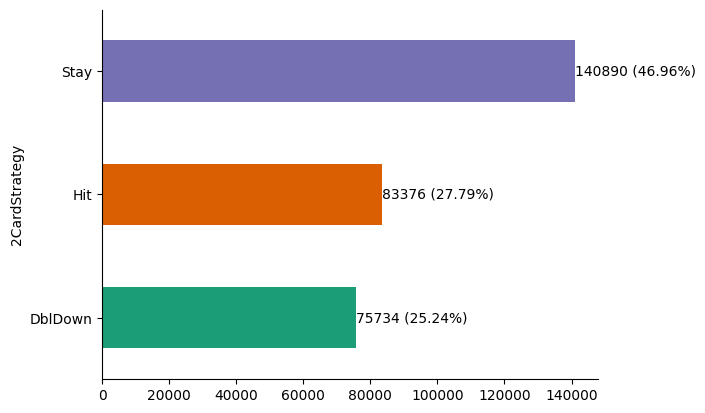

In [4]:
# Bar chart to show % of total selected strategy from original 2card
counts = df.groupby('2CardStrategy').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')

# Show the plot
plt.show()


In [5]:
# 3 card strategy logic
def determine_3CardStrategy(row):
    if row['2CardStrategy'] == "Stay":
        return "Not Played"
    elif row['2CardStrategy'] == "DblDown" or row['card4'] != 0:
        return "Hit"
    elif row['card4'] == 0:
        return "Stay"

# Create a new column '3CardStrategy' using the defined function
df['3CardStrategy'] = df.apply(determine_3CardStrategy, axis=1)

# Display the updated DataFrame
df

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,plwinamt,dlwinamt,ply2cardsum,unique_id,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,2CardStrategy,3CardStrategy
0,0,Player1,7,10,0,0,0,17,10,8,...,0,10,17,1,2,17,17,17,Stay,Not Played
1,1,Player2,10,9,0,0,0,19,10,8,...,20,0,19,2,2,19,19,19,Stay,Not Played
2,2,Player3,9,8,0,0,0,17,10,8,...,0,10,17,3,2,17,17,17,Stay,Not Played
3,3,Player4,2,10,0,5,0,17,10,8,...,0,10,12,4,2,12,17,17,DblDown,Hit
4,4,Player5,10,2,0,5,0,17,10,8,...,0,10,12,5,2,12,17,17,DblDown,Hit
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,0,10,13,299996,3,13,13,13,Stay,Not Played
299996,2,Player3,4,2,7,0,0,13,2,4,...,0,10,6,299997,3,13,13,13,Hit,Stay
299997,3,Player4,2,8,3,0,0,13,2,4,...,0,10,10,299998,3,13,13,13,Hit,Stay
299998,4,Player5,7,5,0,4,0,16,2,4,...,0,10,12,299999,3,12,16,16,DblDown,Hit


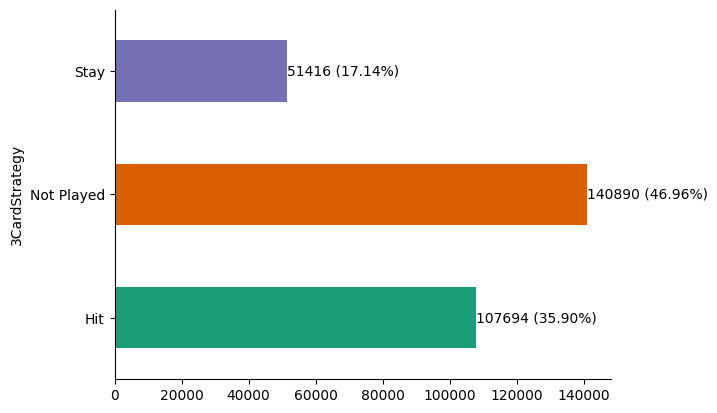

In [6]:
# Bar chart to show % of total selected strategy from 3card
counts = df.groupby('3CardStrategy').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')

# Show the plot
plt.show()

In [7]:
# 4 card strategy logic
def determine_4CardStrategy(row):
    if row['card5'] != 0:
        return "Hit"
    elif row['card4'] != 0 and row['card5']== 0:
        return "Stay"
    else:
        return "Not Played"

# Create a new column '3CardStrategy' using the defined function
df['4CardStrategy'] = df.apply(determine_4CardStrategy, axis=1)

# Display the updated DataFrame
df

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,dlwinamt,ply2cardsum,unique_id,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,2CardStrategy,3CardStrategy,4CardStrategy
0,0,Player1,7,10,0,0,0,17,10,8,...,10,17,1,2,17,17,17,Stay,Not Played,Not Played
1,1,Player2,10,9,0,0,0,19,10,8,...,0,19,2,2,19,19,19,Stay,Not Played,Not Played
2,2,Player3,9,8,0,0,0,17,10,8,...,10,17,3,2,17,17,17,Stay,Not Played,Not Played
3,3,Player4,2,10,0,5,0,17,10,8,...,10,12,4,2,12,17,17,DblDown,Hit,Stay
4,4,Player5,10,2,0,5,0,17,10,8,...,10,12,5,2,12,17,17,DblDown,Hit,Stay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,10,13,299996,3,13,13,13,Stay,Not Played,Not Played
299996,2,Player3,4,2,7,0,0,13,2,4,...,10,6,299997,3,13,13,13,Hit,Stay,Not Played
299997,3,Player4,2,8,3,0,0,13,2,4,...,10,10,299998,3,13,13,13,Hit,Stay,Not Played
299998,4,Player5,7,5,0,4,0,16,2,4,...,10,12,299999,3,12,16,16,DblDown,Hit,Stay


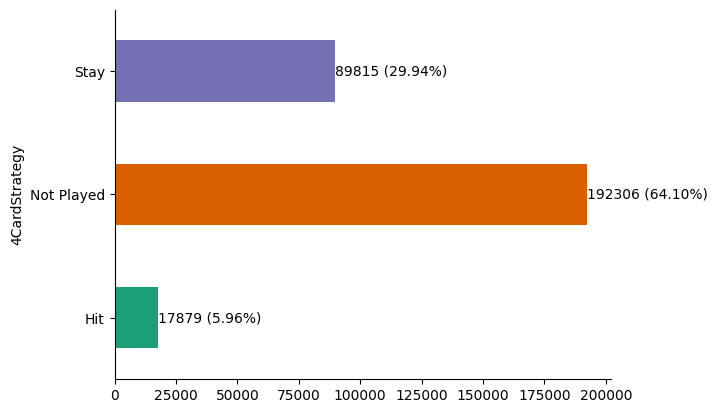

In [8]:
# Bar chart to show % of total selected strategy from 4card
counts = df.groupby('4CardStrategy').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')

# Show the plot
plt.show()

In [9]:
# 5 card strategy logic
def determine_5CardStrategy(row):
    if row['card5'] != 0:
        return "Stay"
    else:
        return "Not Played"

# Create a new column '3CardStrategy' using the defined function
df['5CardStrategy'] = df.apply(determine_5CardStrategy, axis=1)

# Display the updated DataFrame
df

,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,ply2cardsum,unique_id,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,2CardStrategy,3CardStrategy,4CardStrategy,5CardStrategy
0,0,Player1,7,10,0,0,0,17,10,8,...,17,1,2,17,17,17,Stay,Not Played,Not Played,Not Played
1,1,Player2,10,9,0,0,0,19,10,8,...,19,2,2,19,19,19,Stay,Not Played,Not Played,Not Played
2,2,Player3,9,8,0,0,0,17,10,8,...,17,3,2,17,17,17,Stay,Not Played,Not Played,Not Played
3,3,Player4,2,10,0,5,0,17,10,8,...,12,4,2,12,17,17,DblDown,Hit,Stay,Not Played
4,4,Player5,10,2,0,5,0,17,10,8,...,12,5,2,12,17,17,DblDown,Hit,Stay,Not Played
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,13,299996,3,13,13,13,Stay,Not Played,Not Played,Not Played
299996,2,Player3,4,2,7,0,0,13,2,4,...,6,299997,3,13,13,13,Hit,Stay,Not Played,Not Played
299997,3,Player4,2,8,3,0,0,13,2,4,...,10,299998,3,13,13,13,Hit,Stay,Not Played,Not Played
299998,4,Player5,7,5,0,4,0,16,2,4,...,12,299999,3,12,16,16,DblDown,Hit,Stay,Not Played


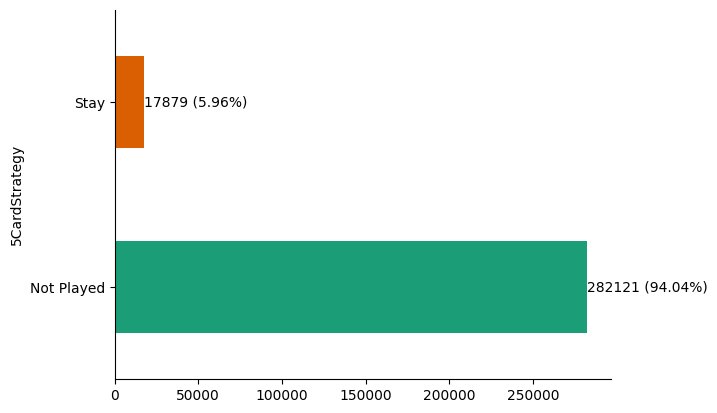

In [10]:
# Bar chart to show % of total selected strategy from 5card
counts = df.groupby('5CardStrategy').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')

# Show the plot
plt.show()

In [11]:
# Create a new column 'PlayershandsPlayed' using logic of 2CardStrategy

def calculate_players_hands_played(row):
    if row['2CardStrategy'] == "Stay":
        return 1
    elif row['3CardStrategy'] == "Stay":
        return 2
    elif row['4CardStrategy'] == "Stay":
        return 3
    elif row['5CardStrategy'] == "Stay":
        return 4
    return None  # For cases where no conditions are met

# Apply the function to create a new column
df['PlayershandsPlayed'] = df.apply(calculate_players_hands_played, axis=1)


# Display the updated DataFrame
df


,PlayerName,PlayerNo,card1,card2,card3,card4,card5,sumofcards,dealcard1,dealcard2,...,unique_id,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,2CardStrategy,3CardStrategy,4CardStrategy,5CardStrategy,PlayershandsPlayed
0,0,Player1,7,10,0,0,0,17,10,8,...,1,2,17,17,17,Stay,Not Played,Not Played,Not Played,1
1,1,Player2,10,9,0,0,0,19,10,8,...,2,2,19,19,19,Stay,Not Played,Not Played,Not Played,1
2,2,Player3,9,8,0,0,0,17,10,8,...,3,2,17,17,17,Stay,Not Played,Not Played,Not Played,1
3,3,Player4,2,10,0,5,0,17,10,8,...,4,2,12,17,17,DblDown,Hit,Stay,Not Played,3
4,4,Player5,10,2,0,5,0,17,10,8,...,5,2,12,17,17,DblDown,Hit,Stay,Not Played,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,5,8,0,0,0,13,2,4,...,299996,3,13,13,13,Stay,Not Played,Not Played,Not Played,1
299996,2,Player3,4,2,7,0,0,13,2,4,...,299997,3,13,13,13,Hit,Stay,Not Played,Not Played,2
299997,3,Player4,2,8,3,0,0,13,2,4,...,299998,3,13,13,13,Hit,Stay,Not Played,Not Played,2
299998,4,Player5,7,5,0,4,0,16,2,4,...,299999,3,12,16,16,DblDown,Hit,Stay,Not Played,3


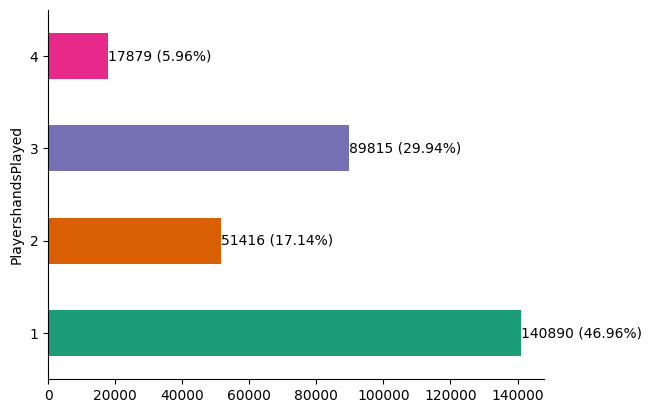

In [12]:
# Bar chart to show % of total selected strategy from 5card
counts = df.groupby('PlayershandsPlayed').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')

# Show the plot
plt.show()

In [13]:
# Group by 'sumofcards' and 'plybustbeat', then count occurrences
result = df.groupby(['PlayershandsPlayed', 'winloss', ]).size().reset_index(name='count')

# Display the result
print(result)

    PlayershandsPlayed winloss  count
0                    1    Loss  51385
1                    1    Push  14917
2                    1     Win  74588
3                    2    Loss  19192
4                    2    Push   5388
5                    2     Win  26836
6                    3    Loss  59411
7                    3    Push   6602
8                    3     Win  23802
9                    4    Loss  12640
10                   4    Push   1090
11                   4     Win   4149


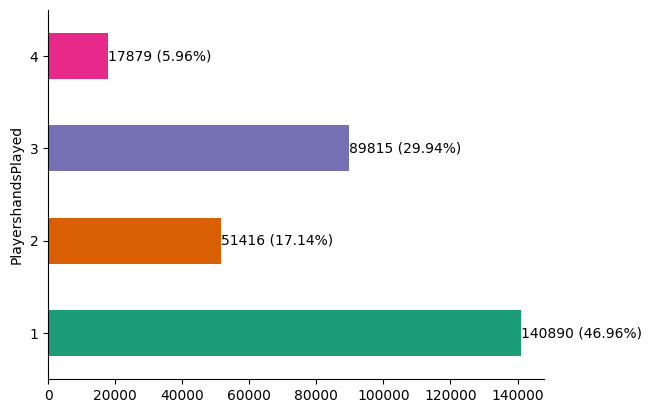

In [14]:
# DataFrame and 'plybustbeat' is a column
counts = df.groupby('PlayershandsPlayed').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')
# Show the plot
plt.show()

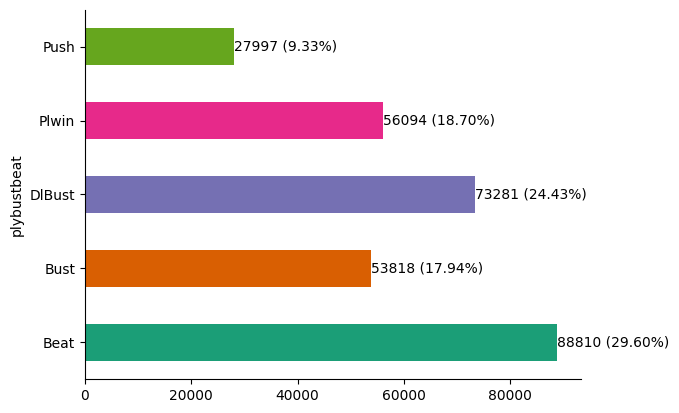

In [15]:
# DataFrame and 'plybustbeat' is a column
counts = df.groupby('plybustbeat').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')

# Show the plot
plt.show()

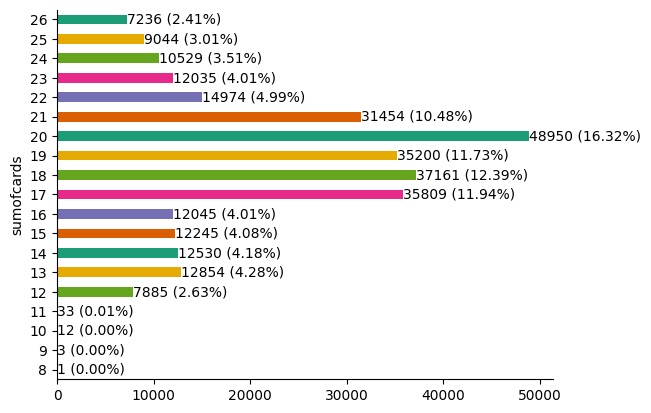

In [16]:
# DataFrame and 'plybustbeat' is a column
counts = df.groupby('sumofcards').size()
total = counts.sum()  # Calculate the total count for percentage calculation

# Plot the horizontal bar plot
counts.plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))

# Customize the plot by removing top and right spines
plt.gca().spines[['top', 'right']].set_visible(False)

# Add percentage and value labels to the bars
for index, value in enumerate(counts):
    percentage = (value / total) * 100  # Calculate percentage
    # Display both the value and percentage in the label
    plt.text(value, index, f'{value} ({percentage:.2f}%)', va='center', ha='left')
# Show the plot
plt.show()

In [17]:
# Make a copy of original dataframe "df" and drop unnecessary columns that was not used in tableau visualization
new_df = df.copy()
columns_to_drop = ['card1', 'card2', 'card3', 'card4', 'card5', 'dealcard1', 'dealcard2', 'dealcard3', 'dealcard4', 'dealcard5']
new_df = new_df.drop(columns=columns_to_drop)
new_df

,PlayerName,PlayerNo,sumofcards,sumofdeal,blkjck,winloss,plybustbeat,dlbustbeat,plwinamt,dlwinamt,...,unique_id,DealershandsPlayed,ply3cardsum,ply4cardsum,ply5cardsum,2CardStrategy,3CardStrategy,4CardStrategy,5CardStrategy,PlayershandsPlayed
0,0,Player1,17,18,nowin,Loss,Beat,Dlwin,0,10,...,1,2,17,17,17,Stay,Not Played,Not Played,Not Played,1
1,1,Player2,19,18,nowin,Win,Plwin,Beat,20,0,...,2,2,19,19,19,Stay,Not Played,Not Played,Not Played,1
2,2,Player3,17,18,nowin,Loss,Beat,Dlwin,0,10,...,3,2,17,17,17,Stay,Not Played,Not Played,Not Played,1
3,3,Player4,17,18,nowin,Loss,Beat,Dlwin,0,10,...,4,2,12,17,17,DblDown,Hit,Stay,Not Played,3
4,4,Player5,17,18,nowin,Loss,Beat,Dlwin,0,10,...,5,2,12,17,17,DblDown,Hit,Stay,Not Played,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,1,Player2,13,17,nowin,Loss,Beat,Dlwin,0,10,...,299996,3,13,13,13,Stay,Not Played,Not Played,Not Played,1
299996,2,Player3,13,17,nowin,Loss,Beat,Dlwin,0,10,...,299997,3,13,13,13,Hit,Stay,Not Played,Not Played,2
299997,3,Player4,13,17,nowin,Loss,Beat,Dlwin,0,10,...,299998,3,13,13,13,Hit,Stay,Not Played,Not Played,2
299998,4,Player5,16,17,nowin,Loss,Beat,Dlwin,0,10,...,299999,3,12,16,16,DblDown,Hit,Stay,Not Played,3


In [18]:
# Save the DataFrame to a CSV file
new_df.to_csv('blackjack_dataset_tableau_probability.csv', index=False)

from google.colab import files

# Download the file
files.download('blackjack_dataset_tableau_probability.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>